# Quantum Transport: Atom to Transistor by Supriyo Datta 

***

# Table of Contents

7. <font size="3.5">[Capacitance](#seventh-chapter)<br></font>
    7.1. [Model Hamiltonian](#7.1)<br>
    7.2. [Electron density/density matrix](#7.2)<br>
    7.3. [Quantum vs. electrostatic capacitance](#7.3)<br>
    7.4. [Supplementary notes: multi-band effective mass Hamiltonian](#7.4)<br>

[_References_](#references)<br>

***

# 7. Capacitance <a id="seventh-chapter"></a>

## <font color = "navy" >7.1 Model Hamiltonian </font> <a id="7.1"></a>

<font color = "olive"> <u> 
- Previous variables are killed and a fresh start is conducted.</u> </font>

In [117]:
%reset -f
%matplotlib inline
from pylab import *

In [118]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; q=1.602e-19; a=3e-10; m=9.110e-31;

#Conduction band parameters
mw=0.07*m; ma=0.22*m; mb=(0.7*mw)+(0.3*ma); kk=0*0.1*pi;
Ec=0; Eb=(0.7*0)+(0.3*1.25);

#Initializing arrays
W=zeros((24)); E1=zeros((24)); E2=zeros((24));

for nk in range(0,24):
    Nw=nk+11; Nb=2*Nw; Np=Nb+Nw+Nb; W[nk]=(Nw-1)*a*1e9;
    tb=(hbar**2)/(2*mb*(a**2)*q); tw=(hbar**2)/(2*mw*(a**2)*q);
    t=hstack((tb*ones((Nb)),tw*ones((Nw-1)),tb*ones((Nb))));
    tt=hstack((0,t))+hstack((t,0));
    Ebk=Eb+(tb*(kk**2)); Ewk=tw*(kk**2); Ebwk=(Eb/2)+((tb+tw)*(kk**2)/2);
    U=Ec+hstack((Ebk*ones((Nb)),Ebwk,Ewk*ones((Nw-2)),Ebwk,Ebk*ones((Nb))));
    H=-diag(t,1)-diag(t,-1)+diag(tt)+diag(U);
    [D,V]=eigh(H);
    E1[nk]=D[0]; E2[nk]=D[1];

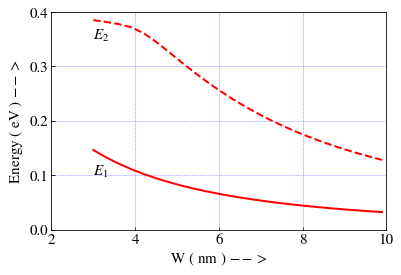

In [119]:
plot(W,E1,'r',lw=2)
plot(W,E2,'r--',lw=2)
xlabel(' W ( nm ) $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(2,10)
ylim(0,0.4)
tick_params(axis='both',which='major',labelsize=15,direction='in')
text(3,0.35,'$E_2$',fontsize=15)
text(3,0.1,'$E_1$',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 7.1.5__ Energy of the two lowest energy levels of a GaAs quantum well sandwiched between Al$_{0.3}$Ga$_{0.7}$As barriers (shown in inset) as a function of the well width $W$ calculated from a one-band effective mass model. </font>

***

In [120]:
%reset -f
%matplotlib inline
from pylab import *

In [121]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; q=1.602e-19; a=3e-10; m=9.110e-31;

#Conduction band parameters
mw=0.07*m; ma=0.22*m; mb=(0.7*mw)+(0.3*ma); kk=0*0.1*pi;
Nw=24; Nb=2*Nw; Np=Nb+Nw+Nb; W=(Nw-1)*a*1e9
Ec=0; Eb=(0.7*0)+(0.3*1.25); 

#Initializing arrays
k=zeros((26)); E1=zeros((26)); E2=zeros((26));

for nk in range(0,26):
    kk=(nk)*a*1e10/500; k[nk]=kk/(a*1e9);
    tb=(hbar**2)/(2*mb*(a**2)*q); tw=(hbar**2)/(2*mw*(a**2)*q);
    t=hstack((tb*ones((Nb)),tw*ones((Nw-1)),tb*ones((Nb))));
    tt=hstack((0,t))+hstack((t,0));
    Ebk=Eb+(tb*(kk**2)); Ewk=tw*(kk**2); Ebwk=(Eb/2)+((tb+tw)*(kk**2)/2);
    U=Ec+hstack((Ebk*ones((Nb)),Ebwk,Ewk*ones((Nw-2)),Ebwk,Ebk*ones((Nb))));
    H=-diag(t,1)-diag(t,-1)+diag(tt)+diag(U);
    [D,V]=linalg.eigh(H);
    E1[nk]=D[0]; E2[nk]=D[1];

E1w=E1[0]+(hbar**2)*(k**2)/(2*mw*1e-18*q);
E2w=E2[0]+(hbar**2)*(k**2)/(2*mw*1e-18*q);
E1b=E1[0]+(hbar**2)*(k**2)/(2*mb*1e-18*q);
E2b=E2[0]+(hbar**2)*(k**2)/(2*mb*1e-18*q);

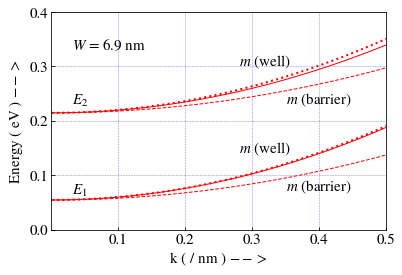

In [122]:
plot(k,E1,'r',lw=1)
plot(k,E2,'r',lw=1)
plot(k,E1w,'r:',lw=2)
plot(k,E2w,'r:',lw=2)
plot(k,E1b,'r--',lw=1)
plot(k,E2b,'r--',lw=1)
xlabel(' k ( / nm ) $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,0.5)
ylim(0,0.4)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.1,0.6,0.1))
text(0.03,0.33,'$W$ = 6.9 nm',fontsize=15)
text(0.03,0.23,'$E_2$',fontsize=15)
text(0.03,0.065,'$E_1$',fontsize=15)
text(0.28,0.3,'$m$ (well)',fontsize=15)
text(0.28,0.14,'$m$ (well)',fontsize=15)
text(0.35,0.23,'$m$ (barrier)',fontsize=15)
text(0.35,0.07,'$m$ (barrier)',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 7.1.6__ Solid curves show the dispersion relation $E(\vec{k})$ as a function of the magnitude of the in-plane wavevector $\vec{k}$ = {$k_x$ $k_y$} for the two lowest subbands of a quantum well of width $W$ = 6.9 nm, calculated from the one-band effective mass model. The ×’s and °’s show the dispersion expected for an effective mass equal to that in the well and in the barrier respectively. </font>

***

## <font color = "navy" >7.2 Electron density/density matrix </font> <a id="7.2"></a>

In [123]:
%reset -f
%matplotlib inline
from pylab import *

In [124]:
#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; eps0=8.85e-12; epsr=4; m=0.25*9.1e-31;
mu=0; kT=0.025; n0=m*kT*q/(2*pi*(hbar**2));

#inputs
a=3e-10; t0=(hbar**2)/(2*m*(a**2)*q); e0=q*a/eps0;
Nox=7; Nc=10;
Np=Nox+Nc+Nox; XX=a*1e9*array(range(1,Np+1));
Ec=transpose(vstack((3*ones((Nox,1)),0*ones((Nc,1)),3*ones((Nox,1)))));

#Hamiltonian matrix
T=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1));

#dielectric constant matrix
D2=epsr*((2*diag(ones((Np))))-(diag(ones((Np-1)),1))-(diag(ones((Np-1)),-1)));
iD2=inv(D2);
Vg=0.25; Ubdy=-epsr*vstack((Vg,zeros((Np-2,1)),Vg));
U0=transpose(dot(iD2,Ubdy));

#self-consistent calculation
U1=transpose(1e-6*ones((Np,1))); UU=U1; change=1;

#Initializing arrays
ncl=zeros((Np));

while change>1e-3:
    U1=U1+(0.1*(UU-U1));
    [D,P]=eigh(T+diagflat(Ec)+diagflat(U1));
    rho=log(1+exp((mu-D)/kT)); rho=dot(dot(P,diag(rho)),transpose(P));
    n=2*n0*diag(rho);
    
    for kp in range(0,Np):
        ncl[kp]=a*2*(n0**1.5)*(mu-Ec[0,kp]-U1[0,kp])/kT;
    
    UU=U0+(dot(iD2,e0*n)); 
    change=max(max((abs(UU-U1))));
    U=Ec+U1; #self-consistent band profile

#electron density in channel per cm2
ns=1e-4*sum(sum(n*vstack((zeros((Nox,1)),ones((Nc,1)),zeros((Nox,1))))));
nn=1e-6*n/a; #electron density per cm3
Fn=mu*ones((Nc+Nox+Nox,1));

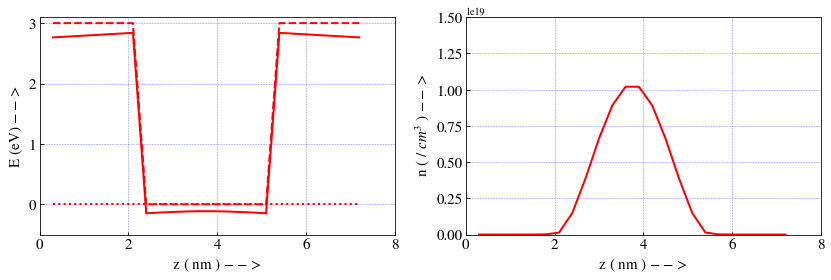

In [125]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(XX,transpose(Ec),'r--',lw=2);
plot(XX,transpose(Ec+U1),'r',lw=2);
plot(XX,Fn,'r:',lw=2);
xlabel(' z ( nm ) $-->$ ',fontsize=15)
ylabel(' E (eV) $-->$ ',fontsize=15)
xlim(0,8)
ylim(-0.5,3.1)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(XX,nn,'r',lw=2);
xlabel(' z ( nm ) $-->$ ',fontsize=15)
ylabel(' n ( /$\ cm^3$ ) $-->$',fontsize=15)
xlim(0,8)
ylim(0,15e18)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 7.2.5__ An MOS capacitor with a channel thickness of (a) 3 nm </font>

In [126]:
%reset -f
%matplotlib inline
from pylab import *

In [127]:
#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; eps0=8.85e-12; epsr=4; m=0.25*9.1e-31;
mu=0; kT=0.025; n0=m*kT*q/(2*pi*(hbar**2));

#inputs
a=3e-10; t0=(hbar**2)/(2*m*(a**2)*q); e0=q*a/eps0;
Nox=7; Nc=30;
Np=Nox+Nc+Nox; XX=a*1e9*array(range(1,Np+1));
Ec=transpose(vstack((3*ones((Nox,1)),0*ones((Nc,1)),3*ones((Nox,1)))));

#Hamiltonian matrix
T=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1));

#dielectric constant matrix
D2=epsr*((2*diag(ones((Np))))-(diag(ones((Np-1)),1))-(diag(ones((Np-1)),-1)));
iD2=inv(D2);
Vg=0.25; Ubdy=-epsr*vstack((Vg,zeros((Np-2,1)),Vg));
U0=transpose(dot(iD2,Ubdy));

#self-consistent calculation
U1=transpose(1e-6*ones((Np,1))); UU=U1; change=1;

#Initializing arrays
ncl=zeros((Np));

while change>1e-3:
    U1=U1+(0.1*(UU-U1));
    [D,P]=eigh(T+diagflat(Ec)+diagflat(U1));
    rho=log(1+exp((mu-D)/kT)); rho=dot(dot(P,diag(rho)),transpose(P));
    n=2*n0*diag(rho);
    
    for kp in range(0,Np):
        ncl[kp]=a*2*(n0**1.5)*(mu-Ec[0,kp]-U1[0,kp])/kT;
    
    UU=U0+(dot(iD2,e0*n)); 
    change=max(max((abs(UU-U1))));
    U=Ec+U1; #self-consistent band profile

#electron density in channel per cm2
ns=1e-4*sum(sum(n*vstack((zeros((Nox,1)),ones((Nc,1)),zeros((Nox,1))))));
nn=1e-6*n/a; #electron density per cm3
Fn=mu*ones((Nc+Nox+Nox,1));

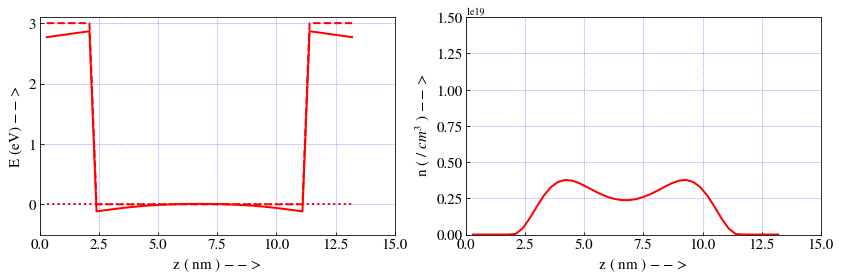

In [128]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(XX,transpose(Ec),'r--',lw=2);
plot(XX,transpose(Ec+U1),'r',lw=2);
plot(XX,Fn,'r:',lw=2);
xlabel(' z ( nm ) $-->$ ',fontsize=15)
ylabel(' E (eV) $-->$ ',fontsize=15)
xlim(0,15)
ylim(-0.5,3.1)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

subplot(1,2,2)
plot(XX,nn,'r',lw=2);
xlabel(' z ( nm ) $-->$ ',fontsize=15)
ylabel(' n ( /$\ cm^3$ ) $-->$',fontsize=15)
xlim(0,15)
ylim(0,15e18)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 7.2.5__ An MOS capacitor with a channel thickness of (b) 9 nm </font>

***

## <font color = "navy" >7.3 Quantum vs. electrostatic capacitance </font> <a id="7.3"></a>

In [129]:
%reset -f
%matplotlib inline
from pylab import *

In [130]:
#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; eps0=8.85E-12; epsr=4; m=0.25*9.1e-31;
mu=0; kT=0.025; n0=m*kT*q/(2*pi*(hbar**2));

#inputs
a=3e-10; t0=(hbar**2)/(2*m*(a**2)*q); e0=q*a/eps0;
Nox=7; Nc=10; #use Nc=10,30 for 3,9nm channel respectively
Np=Nox+Nc+Nox; XX=a*1e9*array(range(1,Np+1));
Ec=transpose(vstack((3*ones((Nox,1)),0*ones((Nc,1)),3*ones((Nox,1)))));

#Hamiltonian matrix
T=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1));

#dielectric constant matrix
D2=epsr*((2*diag(ones((Np))))-(diag(ones((Np-1)),1))-(diag(ones((Np-1)),-1)));
iD2=inv(D2);
Vg=linspace(-0.25,0.25,26);

#Initializing arrays
ncl=zeros((Np)); ns=zeros((26)); nn=zeros((24,26)); Fn=zeros((24,26));

for kg in range(0,26):
    Ubdy=-epsr*vstack((Vg[kg],zeros((Np-2,1)),Vg[kg])); 
    U0=transpose(dot(iD2,Ubdy));

    #self-consistent calculation
    U1=transpose(1e-6*ones((Np,1))); UU=U1; change=1;
    
    while change>1e-3:
        U1=U1+(0.1*(UU-U1));
        [D,P]=eigh(T+diagflat(Ec)+diagflat((U1)));
        rho=log(1+exp((mu-D)/kT)); rho=dot(dot(P,diag(rho)),transpose(P)); 
        n=2*n0*diag(rho);
    
        for kp in range(0,Np):
            ncl[kp]=a*2*(n0**1.5)*(mu-Ec[0,kp]-U1[0,kp])/kT;
        
        UU=U0+(dot(iD2,e0*n)); 
        change=max(max((abs(UU-U1))));
        U=Ec+U1; #self-consistent band profile

    #electron density in channel per cm2
    ns[kg]=1e-4*sum(sum(n*transpose(vstack((zeros((Nox,1)),ones((Nc,1)),zeros((Nox,1)))))));
    nn[:,kg]=1e-6*n/a; #electron density per cm3
    Fn[:,kg]=transpose(mu*ones((Nc+Nox+Nox,1)));

C=q*(ns[25]-ns[24])/(Vg[25]-Vg[24]);
d=1e-4*epsr*eps0*2/C;

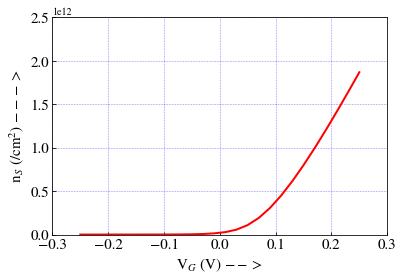

In [131]:
plot(Vg,ns,'r',lw=2)
xlabel(' V$_G$ (V) $-->$ ',fontsize=15)
ylabel(' n$_S$ (/cm$^2$) $--->$ ',fontsize=15)
xlim(-0.3,0.3)
ylim(0,2.5e12)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 7.3.1__ Electron density per unit area, $n_S$ in a 3 nm and a 9 nm channel as a function of the gate voltage $V_G$ applied symmetrically to both gates. </font>

***

In [132]:
%reset -f
%matplotlib inline
from pylab import *

In [133]:
E=linspace(-0.5,1,1001); E=E+0j;
D=sqrt(E);

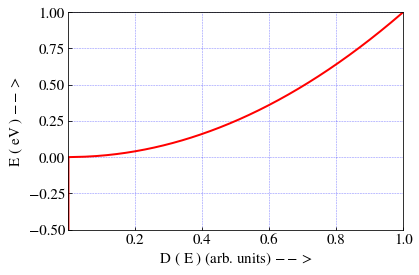

In [134]:
plot(real(D),real(E),'r',lw=2)
xlabel(' D ( E ) (arb. units) $-->$ ',fontsize=15)
ylabel(' E ( eV ) $-->$ ',fontsize=15)
xlim(0,1)
ylim(-0.5,1)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2,1.2,0.2))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 7.3.2__ A positive voltage $V_G$ applied to the gate moves the density of states $D(E)$ downwards. Since the electrochemical potential $\mu$ remains fixed, this increases the number of occupied states and hence the number of electrons $N$. </font>

***

In [135]:
%reset -f
%matplotlib inline
from pylab import *

In [136]:
E=linspace(-0.25,0.25,501); dE=E[1]-E[0]; kT=0.025; Ef=0;
V=0; mu1=Ef+(V/2); mu2=Ef-(V/2);
f1=1/(1+exp((E-mu1)/kT)); f2=1/(1+exp((E-mu2)/kT));
FT=hstack((0,diff(f1)));
FT=FT*(-1/dE);

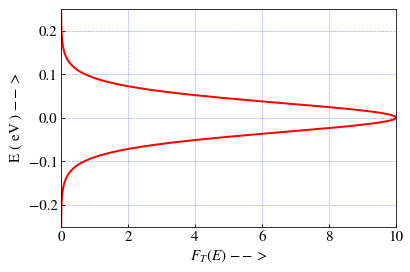

In [137]:
plot(FT,E,'r',lw=2);
xlabel(' $F_T(E)$ $-->$ ',fontsize=15)
ylabel(' E ( eV ) $-->$ ',fontsize=15)
xlim(0,10)
ylim(-0.25,0.25)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 7.3.4__ Plot of the thermal broadening function $F_T(E)$ with $k_BT$ = 0.025 eV. </font>

***

## <font color = "navy" >7.4 Supplementary notes: multi-band effective mass Hamiltonian </font> <a id="7.4"></a>

In [138]:
%reset -f
%matplotlib inline
from pylab import *

In [139]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; q=1.602e-19; a=2.45e-10*4/sqrt(3); m=9.110e-31;
d1=array([1,1,1])/4; d2=array([1,-1,-1])/4; d3=array([-1,1,-1])/4; d4=array([-1,-1,1])/4;

#sp3s* model parameters
soa=0.3787/3; soc=0.0129/3;
Esa=-8.3431; Epa=1.0414; Esc=-2.6569; Epc=3.6686; Esea=8.5914; Esec=6.7386;
Vss=-6.4513; Vxx=1.9546; Vxy=5.0779; Vpasc=-5.7839; Vpasec=-4.8077;
Vsapc=4.4800; Vseapc=4.8422;

#Valence band Luttinger-Kohn parameters
Ev=-0.1; dele=0.3; g1=6.85; g2=2.1; g3=2.9;
t1=(hbar**2)*g1/(2*m*q*(a**2));
t2=(hbar**2)*g2/(2*m*q*(a**2));
t3=(hbar**2)*g3/(2*m*q*(a**2));
Nt=101; kk=1*linspace(0,1,Nt);

In [140]:
#L-direction
l=0.5; m=0.5; n=0.5; 

#Initializing arrays
z=zeros((5,5)); Z=zeros((10,10));
E=zeros((Nt,20)); ELK4=zeros((Nt,4)); ELK6=zeros((Nt,6)); 
Y=zeros((2*Nt,20)); Y1=zeros((2*Nt,4)); Y2=zeros((2*Nt,6));
X=zeros((2*Nt));

for Nk in range(0,Nt):
    k=2*pi*kk[Nk]*array([l,m,n]);
    
    #sp3s* model
    p1=exp(1j*sum(k*d1)); p2=exp(1j*sum(k*d2));
    p3=exp(1j*sum(k*d3)); p4=exp(1j*sum(k*d4));
    g0=(p1+p2+p3+p4)/4; g1=(p1+p2-p3-p4)/4;
    g2=(p1-p2+p3-p4)/4; g3=(p1-p2-p3+p4)/4;
    a1=diag([Esa,Epa,Epa,Epa,Esea]); A1=vstack((hstack((a1,z)),hstack((z,a1))));
    a2=diag([Esc,Epc,Epc,Epc,Esec]); A2=vstack((hstack((a2,z)),hstack((z,a2))));
    b=([[Vss*g0,Vsapc*g1,Vsapc*g2,Vsapc*g3,0],[Vpasc*g1,Vxx*g0,Vxy*g3,Vxy*g2,Vpasec*g1],[Vpasc*g2,Vxy*g3,Vxx*g0,Vxy*g1,Vpasec*g2],[Vpasc*g3,Vxy*g2,Vxy*g1,Vxx*g0,Vpasec*g3],[0,Vseapc*conj(g1),Vseapc*conj(g2),Vseapc*conj(g3),0]]);
    B=vstack((hstack((b,z)),hstack((z,b))));
    h=vstack((hstack((a1,b)),hstack((conj(transpose(b)),a2))));
    H=vstack((hstack((A1,B)),hstack((conj(transpose(B)),A2))));
    aso=soa*array([[0,0,0,0,0,0,0,0,0,0],[0,0,-1j,0,0,0,0,0,1,0],[0,1j,0,0,0,0,0,0,-1j,0],[0,0,0,0,0,0,-1,1j,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,-1,0,0,0,1j,0,0],[0,0,0,-1j,0,0,-1j,0,0,0],[0,1,1j,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]);
    cso=soc*array([[0,0,0,0,0,0,0,0,0,0],[0,0,-1j,0,0,0,0,0,1,0],[0,1j,0,0,0,0,0,0,-1j,0],[0,0,0,0,0,0,-1,1j,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,-1,0,0,0,1j,0,0],[0,0,0,-1j,0,0,-1j,0,0,0],[0,1,1j,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]);
    H=H+vstack((hstack((aso,Z)),hstack((Z,cso))));
    [D,V]=eigh(H);
    E[Nk,:]=D;
    
    #Valence band Luttinger-Kohn model
    P=Ev+(t1*sum(k*k));Q=t2*((k[0]**2)+(k[1]**2)-(2*(k[2]**2)));
    R=-(sqrt(3)*t2*((k[0]**2)-(k[1]**2)))+(1j*2*t3*sqrt(3)*k[0]*k[1]);
    S=2*t3*sqrt(3)*((k[0]-(1j*k[1]))*k[2]);
    H4=-array([[P+Q,-S,R,0],[-conj(transpose(S)),P-Q,0,R],[conj(transpose(R)),0,P-Q,S],[0,conj(transpose(R)),conj(transpose(S)),P+Q]]);
    [D,V]=eigh(H4);
    ELK4[Nk,:]=D;
    
    H6=-array([[P+Q,-S,R,0,-S/sqrt(2),sqrt(2)*R],[-conj(transpose(S)),P-Q,0,R,-sqrt(2)*Q,sqrt(1.5)*S],[conj(transpose(R)),0,P-Q,S,sqrt(1.5)*conj(transpose(S)),sqrt(2)*Q],[0,conj(transpose(R)),conj(transpose(S)),P+Q,-sqrt(2)*conj(transpose(R)),-conj(transpose(S))/sqrt(2)],[-conj(transpose(S))/sqrt(2),-sqrt(2)*conj(transpose(Q)),sqrt(1.5)*S,-sqrt(2)*R,P+dele,0],[sqrt(2)*conj(transpose(R)),sqrt(1.5)*conj(transpose(S)),sqrt(2)*conj(transpose(Q)),-S/sqrt(2),0,P+dele]]);
    [D,V]=eigh(H6);
    ELK6[Nk,:]=D;

Y[0:Nt,:]=E; Y1[0:Nt,:]=ELK4; Y2[0:Nt,:]=ELK6;
X[0:Nt]=-kk;

In [141]:
#X-direction
l=1; m=0; n=0; 

#Initializing arrays
z=zeros((5,5)); Z=zeros((10,10));
E=zeros((Nt,20)); ELK4=zeros((Nt,4)); ELK6=zeros((Nt,6));

for Nk in range(0,Nt):
    k=2*pi*kk[Nk]*array([l,m,n]);
    
    #sp3s* model
    p1=exp(1j*sum(k*d1)); p2=exp(1j*sum(k*d2));
    p3=exp(1j*sum(k*d3)); p4=exp(1j*sum(k*d4));
    g0=(p1+p2+p3+p4)/4; g1=(p1+p2-p3-p4)/4;
    g2=(p1-p2+p3-p4)/4; g3=(p1-p2-p3+p4)/4;
    a1=diag([Esa,Epa,Epa,Epa,Esea]); A1=vstack((hstack((a1,z)),hstack((z,a1))));
    a2=diag([Esc,Epc,Epc,Epc,Esec]); A2=vstack((hstack((a2,z)),hstack((z,a2))));
    b=([[Vss*g0,Vsapc*g1,Vsapc*g2,Vsapc*g3,0],[Vpasc*g1,Vxx*g0,Vxy*g3,Vxy*g2,Vpasec*g1],[Vpasc*g2,Vxy*g3,Vxx*g0,Vxy*g1,Vpasec*g2],[Vpasc*g3,Vxy*g2,Vxy*g1,Vxx*g0,Vpasec*g3],[0,Vseapc*conj(g1),Vseapc*conj(g2),Vseapc*conj(g3),0]]);
    B=vstack((hstack((b,z)),hstack((z,b))));
    h=vstack((hstack((a1,b)),hstack((conj(transpose(b)),a2))));
    H=vstack((hstack((A1,B)),hstack((conj(transpose(B)),A2))));
    aso=soa*array([[0,0,0,0,0,0,0,0,0,0],[0,0,-1j,0,0,0,0,0,1,0],[0,1j,0,0,0,0,0,0,-1j,0],[0,0,0,0,0,0,-1,1j,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,-1,0,0,0,1j,0,0],[0,0,0,-1j,0,0,-1j,0,0,0],[0,1,1j,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]);
    cso=soc*array([[0,0,0,0,0,0,0,0,0,0],[0,0,-1j,0,0,0,0,0,1,0],[0,1j,0,0,0,0,0,0,-1j,0],[0,0,0,0,0,0,-1,1j,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,-1,0,0,0,1j,0,0],[0,0,0,-1j,0,0,-1j,0,0,0],[0,1,1j,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]);
    H=H+vstack((hstack((aso,Z)),hstack((Z,cso))));
    [D,V]=eigh(H);
    E[Nk,:]=D;
    
    #Valence band Luttinger-Kohn model
    P=Ev+(t1*sum(k*k));Q=t2*((k[0]**2)+(k[1]**2)-(2*(k[2]**2)));
    R=-(sqrt(3)*t2*((k[0]**2)-(k[1]**2)))+(1j*2*t3*sqrt(3)*k[0]*k[1]);
    S=2*t3*sqrt(3)*((k[0]-(1j*k[1]))*k[2]);
    H4=-array([[P+Q,-S,R,0],[-conj(transpose(S)),P-Q,0,R],[conj(transpose(R)),0,P-Q,S],[0,conj(transpose(R)),conj(transpose(S)),P+Q]]);
    [D,V]=eigh(H4);
    ELK4[Nk,:]=D;
    
    H6=-array([[P+Q,-S,R,0,-S/sqrt(2),sqrt(2)*R],[-conj(transpose(S)),P-Q,0,R,-sqrt(2)*Q,sqrt(1.5)*S],[conj(transpose(R)),0,P-Q,S,sqrt(1.5)*conj(transpose(S)),sqrt(2)*Q],[0,conj(transpose(R)),conj(transpose(S)),P+Q,-sqrt(2)*conj(transpose(R)),-conj(transpose(S))/sqrt(2)],[-conj(transpose(S))/sqrt(2),-sqrt(2)*conj(transpose(Q)),sqrt(1.5)*S,-sqrt(2)*R,P+dele,0],[sqrt(2)*conj(transpose(R)),sqrt(1.5)*conj(transpose(S)),sqrt(2)*conj(transpose(Q)),-S/sqrt(2),0,P+dele]]);
    [D,V]=eigh(H6);
    ELK6[Nk,:]=D;

Y[Nt:2*Nt+1,:]=E; Y1[Nt:2*Nt+1,:]=ELK4; Y2[Nt:2*Nt+1,:]=ELK6;
X[Nt:2*Nt+1]=kk;

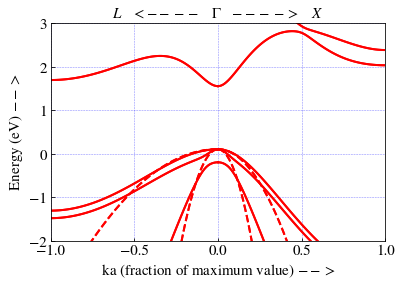

In [142]:
plot(X[0:Nt],Y[0:Nt,:],'r',lw=2)
plot(X[0:Nt],Y1[0:Nt,:],'r--',lw=2)
plot(X[Nt:2*Nt+1],Y[Nt:2*Nt+1,:],'r',lw=2)
plot(X[Nt:2*Nt+1],Y1[Nt:2*Nt+1,:],'r--',lw=2)
xlabel(' ka (fraction of maximum value) $-->$ ',fontsize=15)
ylabel(' Energy (eV) $-->$ ',fontsize=15)
xlim(-1,1)
ylim(-2,3)
tick_params(axis='both',which='major',labelsize=15,direction='in')
title('$L$   $<----$   $\Gamma$   $---->$   $X$',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 7.4.1__ Solid curves show the full bandstructure obtained from the sp$^3$s* model described in Chapter 5. Dashed curves show the dispersion obtained from a two-band effective mass model with parameters adjusted for best fit. </font>

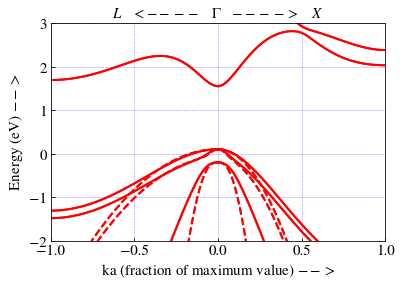

In [143]:
plot(X[0:Nt],Y[0:Nt,:],'r',lw=2)
plot(X[0:Nt],Y2[0:Nt,:],'r--',lw=2)
plot(X[Nt:2*Nt+1],Y[Nt:2*Nt+1,:],'r',lw=2)
plot(X[Nt:2*Nt+1],Y2[Nt:2*Nt+1,:],'r--',lw=2)
xlabel(' ka (fraction of maximum value) $-->$ ',fontsize=15)
ylabel(' Energy (eV) $-->$ ',fontsize=15)
xlim(-1,1)
ylim(-2,3)
tick_params(axis='both',which='major',labelsize=15,direction='in')
title('$L$   $<----$   $\Gamma$   $---->$   $X$',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 7.4.2__ Solid curves show the full bandstructure obtained from the sp$^3$s* model described in Chapter 5. Dashed curves show the dispersion obtained from a three-band effective mass model with parameters adjusted for best fit. </font>

***

In [144]:
%reset -f
%matplotlib inline
from pylab import *

In [145]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; q=1.602e-19; a=3e-10; m=9.110e-31; Eb=0.15;

#Luttinger-Kohn parameters
g1=6.85; g2=2.1; g3=2.9; #GaAs
w1=(hbar**2)*g1/(2*m*q*(a**2)); w2=(hbar**2)*g2/(2*m*q*(a**2)); w3=(hbar**2)*g3/(2*m*q*(a**2));
g1=3.45; g2=0.68; g3=1.29; #AlAs
a1=(hbar**2)*g1/(2*m*q*(a**2)); b1=(0.7*w1)+(0.3*a1);
a2=(hbar**2)*g2/(2*m*q*(a**2)); b2=(0.7*w2)+(0.3*a2);
a3=(hbar**2)*g3/(2*m*q*(a**2)); b3=(0.7*w3)+(0.3*a3);
Ev=0; Evb=(0.7*0)+(0.3*0.75); kx=0*pi; ky=0*pi; k2=(kx**2)+(ky**2);

#Initializing arrays
W=zeros((20)); X=zeros((20)); 
E1=zeros((20)); E2=zeros((20)); E3=zeros((20)); E4=zeros((20));
E5=zeros((20)); E6=zeros((20)); E7=zeros((20)); E8=zeros((20));

for nk in range(0,20):
    Nw=nk+11; Nb=Nw; Np=Nb+Nw+Nb; W[nk]=(Nw-1)*a*1e9; Z=zeros((Np,Np));
    X[nk]=Nw-1;
    t=hstack((b1*ones((Nb)),w1*ones((Nw-1)),b1*ones((Nb)))); tt=hstack((0,t))+hstack((t,0));
    Ebk=Evb+(b1*k2); Ewk=(w1*k2); Ebwk=(Ebk+Ewk)/2;
    U=Ev+hstack((Ebk*ones((Nb)),Ebwk,Ewk*ones((Nw-2)),Ebwk,Ebk*ones((Nb))));
    P=-diag(t,1)-diag(t,-1)+diag(tt)+diag(U);
    t=-2*hstack((b2*ones((Nb)),w2*ones((Nw-1)),b2*ones((Nb)))); tt=hstack((0,t))+hstack((t,0));
    Ebk=b2*k2; Ewk=w2*k2; Ebwk=(Ebk+Ewk)/2;
    U=hstack((Ebk*ones((Nb)),Ebwk,Ewk*ones((Nw-2)),Ebwk,Ebk*ones((Nb))));
    Q=-diag(t,1)-diag(t,-1)+diag(tt)+diag(U);
    Ebk=-(sqrt(3)*b2*((kx**2)-(ky**2)))+(1j*2*b3*sqrt(3)*kx*ky);
    Ewk=-(sqrt(3)*w2*((kx**2)-(ky**2)))+(1j*2*w3*sqrt(3)*kx*ky);
    Ebwk=(Ebk+Ewk)/2;
    U=hstack((Ebk*ones((Nb)),Ebwk,Ewk*ones((Nw-2)),Ebwk,Ebk*ones((Nb))));
    R=diag(U);
    t=2*1j*sqrt(3)*(kx-(1j*ky))*hstack((b3*ones((Nb)),w3*ones((Nw-1)),b3*ones((Nb))));
    S=diag(t,1)-diag(t,-1);
    H=vstack((hstack((P+Q,Z)),hstack((Z,P+Q)))); HL=vstack((hstack((P-Q,Z)),hstack((Z,P-Q))));
    HC=vstack((hstack((-S,R)),hstack((conj(transpose(R)),conj(transpose(S))))));
    H=-vstack((hstack((H,HC)),hstack((conj(transpose(HC)),HL))));
    [D,V]=eigh(H); D=-sort(-D);
    E1[nk]=D[0]; E2[nk]=D[1]; E3[nk]=D[2]; E4[nk]=D[3];
    E5[nk]=D[4]; E6[nk]=D[5]; E7[nk]=D[6]; E8[nk]=D[7];

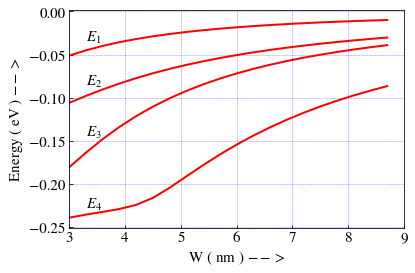

In [146]:
plot(W,E1,'r',lw=2)
plot(W,E3,'r',lw=2)
plot(W,E5,'r',lw=2)
plot(W,E7,'r',lw=2)
xlabel(' W ( nm ) $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(3,9)
tick_params(axis='both',which='major',labelsize=15,direction='in')
text(3.3,-0.034,'$E_1$',fontsize=15)
text(3.3,-0.085,'$E_2$',fontsize=15)
text(3.3,-0.144,'$E_3$',fontsize=15)
text(3.3,-0.228,'$E_4$',fontsize=15)
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 7.4.4__ Energy of the four highest energy levels of a GaAs quantum well sandwiched between Al$_{0.3}$Ga$_{0.7}$As barriers (shown in inset) as a function of the well width $W$ calculated from a two-band effective mass model. </font>

***

In [147]:
%reset -f
%matplotlib inline
from pylab import *

In [148]:
#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34; q=1.602e-19; a=3e-10; m=9.110e-31;

#Luttinger-Kohn parameters
g1=6.85; g2=2.1; g3=2.9; #GaAs
w1=(hbar**2)*g1/(2*m*q*(a**2)); w2=(hbar**2)*g2/(2*m*q*(a**2)); w3=(hbar**2)*g3/(2*m*q*(a**2));
g1=3.45; g2=0.68; g3=1.29; #AlAs
a1=(hbar**2)*g1/(2*m*q*(a**2)); b1=(0.7*w1)+(0.3*a1);
a2=(hbar**2)*g2/(2*m*q*(a**2)); b2=(0.7*w2)+(0.3*a2);
a3=(hbar**2)*g3/(2*m*q*(a**2)); b3=(0.7*w3)+(0.3*a3);
Ev=0; Evb=(0.7*0)+(0.3*0.75);
Nw=18; Nb=Nw; Np=Nb+Nw+Nb; W=(Nw-1)*a*1e9; 

#Initializing arrays
Z=zeros((Np,Np)); k=zeros((26)); 
E1=zeros((26)); E2=zeros((26)); E3=zeros((26)); E4=zeros((26));

for nk in range(0,26):
    k[nk]=(nk)/500;
    l=0; m=1; lm=sqrt((l**2)+(m**2));
    kx=(l/lm)*k[nk]*a*1e10; ky=(m/lm)*k[nk]*a*1e10;
    k2=(kx**2)+(ky**2);
    t=hstack((b1*ones((Nb)),w1*ones((Nw-1)),b1*ones((Nb)))); tt=hstack((0,t))+hstack((t,0));
    Ebk=Evb+(b1*k2); Ewk=(w1*k2); Ebwk=(Ebk+Ewk)/2;
    U=Ev+hstack((Ebk*ones((Nb)),Ebwk,Ewk*ones((Nw-2)),Ebwk,Ebk*ones((Nb))));
    P=-diag(t,1)-diag(t,-1)+diag(tt)+diag(U);
    t=-2*hstack((b2*ones((Nb)),w2*ones((Nw-1)),b2*ones((Nb)))); tt=hstack((0,t))+hstack((t,0));
    Ebk=b2*k2; Ewk=w2*k2; Ebwk=(Ebk+Ewk)/2;
    U=hstack((Ebk*ones((Nb)),Ebwk,Ewk*ones((Nw-2)),Ebwk,Ebk*ones((Nb))));
    Q=-diag(t,1)-diag(t,-1)+diag(tt)+diag(U);
    Ebk=-(sqrt(3)*b2*((kx**2)-(ky**2)))+(1j*2*b3*sqrt(3)*kx*ky);
    Ewk=-(sqrt(3)*w2*((kx**2)-(ky**2)))+(1j*2*w3*sqrt(3)*kx*ky);
    Ebwk=(Ebk+Ewk)/2;
    U=hstack((Ebk*ones((Nb)),Ebwk,Ewk*ones((Nw-2)),Ebwk,Ebk*ones((Nb))));
    R=diag(U);
    t=-2*1j*sqrt(3)*(kx-(1j*ky))*hstack((b3*ones((Nb)),w3*ones((Nw-1)),b3*ones((Nb))))/2;
    S=diag(t,1)-diag(t,-1);
    H=vstack((hstack((P+Q,Z)),hstack((Z,P+Q)))); HL=vstack((hstack((P-Q,Z)),hstack((Z,P-Q))));
    HC=vstack((hstack((-S,R)),hstack((conj(transpose(R)),conj(transpose(S))))));
    H=-vstack((hstack((H,HC)),hstack((conj(transpose(HC)),HL))));
    [D,V]=eigh(H); D=-sort(-D);
    E1[nk]=D[0]; E2[nk]=D[1]; E3[nk]=D[2]; E4[nk]=D[3];

k=k*10; #per Angstrom to per nm

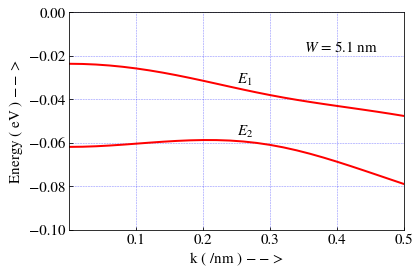

In [149]:
plot(k,E1,'r',lw=2)
plot(k,E3,'r',lw=2)
xlabel(' k ( /nm ) $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,0.5)
ylim(-0.1,0)
tick_params(axis='both',which='major',labelsize=15,direction='in')
text(0.25,-0.033,'$E_1$',fontsize=15)
text(0.25,-0.057,'$E_2$',fontsize=15)
text(0.35,-0.018,'$W$ = 5.1 nm',fontsize=15)
xticks(arange(0.1,0.6,0.1))
grid(color='b', alpha=0.5, ls='--',lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 7.4.5__ The dispersion relation $E(\vec{k})$ as a function of $k_y$ with $k_x$ = 0 for the two highest subbands of a quantum well with $W$ = 5.1 nm, calculated from the two-band effective mass model </font>

***

## _References_ </u><a id="references"></a>

<font color = "stone"><font size = "3" > 
- Datta, S. (2005). Quantum Transport: Atom to Transistor. Cambridge: Cambridge University Press. doi:10.1017/CBO9781139164313 
- Datta, S. “Fundamentals of Nanoelectronics: Basic Concepts”. MOOC offered by the Purdue University. <br>
[Online] https://courses.edx.org/courses/PurdueX/nano520/3T2015/course/
- Datta, S. “Fundamentals of Nanoelectronics, Part B: Quantum Transport”. MOOC offered by the Purdue University. <br> 
[Online] https://courses.edx.org/courses/course-v1:PurdueX+nano521x+2015_T3/course/</font>